# A. FCNN

In [116]:
#libraries
import numpy as np
import zipfile
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from PIL import Image
from tensorflow.keras.utils import to_categorical


a. Load Data

In [117]:
unzip = zipfile.ZipFile("/content/cifar-3class-data.zip","r")
unzip.extractall("/content")
unzip.close()

b. size of the train set

In [118]:
TrainImages = 0

for dirpath, dirnames, filenames in os.walk("/content/cifar-3class-data/train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  TrainImages += len(filenames)

print(f"There are {TrainImages} images in total.")

There are 3 directories and 0 images in '/content/cifar-3class-data/train'.
There are 0 directories and 500 images in '/content/cifar-3class-data/train/1'.
There are 0 directories and 500 images in '/content/cifar-3class-data/train/0'.
There are 0 directories and 500 images in '/content/cifar-3class-data/train/2'.
There are 1500 images in total.


c.visualise any four of  train images

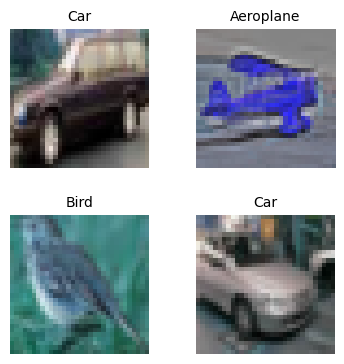

In [ ]:
#path
TrainLoc = "/content/cifar-3class-data/train"

def getRandomImages(TrainLoc="train"):
    imagePaths = []
    for subfolder in ["0", "1", "2"]:
        subfolderLoc = os.path.join(TrainLoc, subfolder)
        if os.path.isdir(subfolderLoc):
            for filename in os.listdir(subfolderLoc):
                fileLoc = os.path.join(subfolderLoc, filename)
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    imagePaths.append(fileLoc)

    # Randomly select 4 images
    imgpaths = random.sample(imagePaths, 4)

    # Set up display
    fig, axes = plt.subplots(2, 2, figsize=(4, 4))

    for i, image_path in enumerate(imgpaths):
        img = mpimg.imread(image_path)
        row, col = divmod(i, 2)
        axes[row, col].imshow(img)
        axes[row, col].axis("off")

        # Label each image
        if 'train/0' in image_path:
            label = "Aeroplane"
        elif 'train/1' in image_path:
            label = "Car"
        elif 'train/2' in image_path:
            label = "Bird"
        axes[row, col].set_title(label, fontsize=10)

    plt.tight_layout(pad=2.0)
    plt.show()

getRandomImages(TrainLoc)


d,e,f,g. Prepare Data

In [ ]:
TrainDir = "/content/cifar-3class-data/train"

def flattenImg(data):
    i, j, k = data.shape
    flattened = []

    for i in range(i):
        for j in range(j):
            for k in range(k):
                flattened.append(data[i][j][k])

    return np.array(flattened)

def prepareData(DirPath):
  classFolders = os.listdir(DirPath)

  images = []
  labels = []


  # Load images from each class folder
  for label, classFolder in enumerate(classFolders):
      classFolderPath = os.path.join(DirPath, classFolder)

      if os.path.isdir(classFolderPath):
          for imageName in os.listdir(classFolderPath):
              imagePath = os.path.join(classFolderPath, imageName)

              image = Image.open(imagePath)  # Open image
              image = image.resize((32, 32))  # Resize image to 32x32 if necessary

              image_array = np.array(image)
              image_array = image_array / 255.0  # Normalize 

              image_vector = flattenImg(image_array)

              images.append(image_vector)
              labels.append(label)

  images = np.array(images)
  images.flatten()
  labels = np.array(labels)

  return images,labels

TrainImages, TrainLabels = prepareData(TrainDir)

# Split the dataset into training (90%) and validation (10%) sets with stratification
trainImages, valImages, trainLabels, valLabels = train_test_split(
    TrainImages, TrainLabels, test_size=0.1, random_state=42, stratify=TrainLabels
)

print("Training set shape:", trainImages.shape)
print("Validation set shape:", valImages.shape)


Training set shape: (1350, 3072)
Validation set shape: (150, 3072)


h. FCNN

In [ ]:
fcnnModel = keras.Sequential([
    layers.InputLayer(input_shape=(3072,)), 
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax') 
])

fcnnModel.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer='adam',
    metrics=['accuracy']
)

fcnnModelHistory = fcnnModel.fit(
    trainImages,
    trainLabels,
    epochs=500,
    batch_size=200,
    validation_data=(valImages, valLabels)
)

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.3436 - loss: 1.4142 - val_accuracy: 0.3333 - val_loss: 1.1506
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3911 - loss: 1.1010 - val_accuracy: 0.6467 - val_loss: 0.9167
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5417 - loss: 0.9599 - val_accuracy: 0.6533 - val_loss: 0.8563
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6311 - loss: 0.8737 - val_accuracy: 0.6533 - val_loss: 0.8039
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6349 - loss: 0.8578 - val_accuracy: 0.7000 - val_loss: 0.7607
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6807 - loss: 0.7983 - val_accuracy: 0.7267 - val_loss: 0.7708
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6557 - loss: 0.8176 - val_accuracy: 0.6800 - val_loss: 0.7826
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6609 - loss: 0.7969 - val_accuracy: 0.7133 - val_loss: 0.7390
Epoch 9/50

i. Plot training and validation accuracies

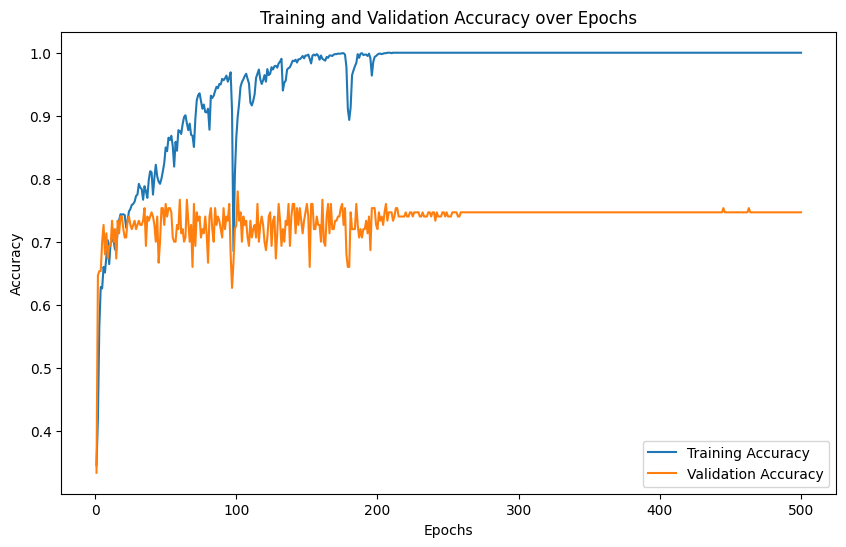

In [122]:
train_accuracy = fcnnModelHistory.history['accuracy']
val_accuracy = fcnnModelHistory.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

# Show the plot
plt.show()

II. Test the above model :<br>
  a. load the images from the Test dataset.<br>
  b. Convert each of the 32 X 32 images into a vector of length 32*32=1024<br>
  c. Normalise the vectorised images.<br>
  d. Use these preprocessed vectorised images to evaluate the model.<br>
  e. Print the test loss and accuracy (%).<br>

In [ ]:
TestDir = "/content/cifar-3class-data/test"
testImages, testLabels = prepareData(TestDir)

# Evaluation
testLoss, testAccuracy = fcnnModel.evaluate(testImages, testLabels, batch_size=200)
print(f"Test Loss: {testLoss:.4f}")
print(f"Test Accuracy: {testAccuracy * 100:.2f}%")

prediction = fcnnModel.predict(testImages)[200]
y_pred = np.argmax(prediction)
y_true = testLabels[200]
class_names = ["Aeroplane" , "Car" , "bird"]
print("Predicted Class: ",class_names[y_pred])
print("Actual Class: ", class_names[y_true])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.7517 - loss: 2.2510
Test Loss: 2.1936
Test Accuracy: 76.00%
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted Class:  bird
Actual Class:  bird


# B. CNN

I. Train a CNN model:<br>
a. Load the images from the Train dataset <br>
b. Create a validation set containing only 10% images of the train set <br>
c. Normalise the images<br>

In [ ]:
TrainDir = "/content/cifar-3class-data/train"
def prepareDataCNN(DirPath):
  classFolders = os.listdir(DirPath)

  images = []
  labels = []


  # Load images from each class folder
  for label, classFolder in enumerate(classFolders):
      classFolderPath = os.path.join(DirPath, classFolder)

      if os.path.isdir(classFolderPath):
          for imageName in os.listdir(classFolderPath):
              imagePath = os.path.join(classFolderPath, imageName)

              image = Image.open(imagePath) # Open image
              image_array = np.array(image)  # Convert image to a numpy array

              image_array = image_array / 255.0 # Normalize

              images.append(image_array)
              labels.append(label)

  images = np.array(images)
  images.flatten()
  labels = np.array(labels)

  return images,labels

TrainImages, TrainLabels = prepareDataCNN(TrainDir)

# Split the dataset into training (90%) and validation (10%) sets with stratification
trainImages, valImages, trainLabels, valLabels = train_test_split(
    TrainImages, TrainLabels, test_size=0.1, random_state=42, stratify=TrainLabels
)

print("Training set shape:", trainImages.shape)
print("Validation set shape:", valImages.shape)


Training set shape: (1350, 32, 32, 3)
Validation set shape: (150, 32, 32, 3)


d,e. CNN Model

- Two consecutive convolutional layers each having 64 filters
of size 3 X 3.
- A maxpool layer to reduce the dimensions of the feature
maps (output of the second convolution layer) to half.
- Two consecutive convolutional layers each having 128
filters of size 3 X 3.
- A maxpool layer to reduce the dimensions of the feature
maps (output of the fourth convolution layer) to half.
- A flattening layer to vectorise the feature tensor (a
matrix of more than two dimensions).
- Two fully connected layers having 512 and 100 neurons,
respectively.
- One fully connected layer serving as the output layer.

In [ ]:
CNNmodel = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),padding='valid'),
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D((2, 2),padding='valid'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

CNNmodel.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
CNNmodelHistory = CNNmodel.fit(
    trainImages,
    trainLabels,
    epochs=50,
    batch_size=200,
    validation_data=(valImages, valLabels) 
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.3325 - loss: 1.1075 - val_accuracy: 0.5067 - val_loss: 1.0720
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4653 - loss: 1.0561 - val_accuracy: 0.6200 - val_loss: 0.9293
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6126 - loss: 0.8956 - val_accuracy: 0.7133 - val_loss: 0.7545
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6680 - loss: 0.8198 - val_accuracy: 0.7467 - val_loss: 0.7292
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7403 - loss: 0.6983 - val_accuracy: 0.7267 - val_loss: 0.6889
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7206 - loss: 0.6523 - val_accuracy: 0.7000 - val_loss: 0.6763
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7535 - loss: 0.5885 - val_accuracy: 0.7400 - val_loss: 0.5978
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7752 - loss: 0.5442 - val_accuracy: 0.8000 - val_loss: 0.5213

f. Save the model.


In [126]:
CNNmodel.save("/content/cnn_model.keras")

g. Plot the epoch-wise training and validation

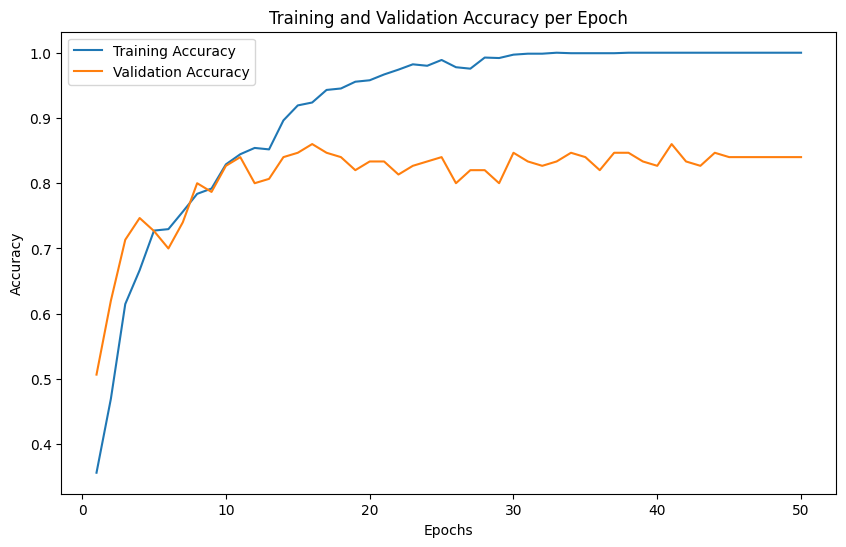

In [ ]:
train_accuracy = CNNmodelHistory.history['accuracy']
val_accuracy = CNNmodelHistory.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 51), val_accuracy, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()

# Display the plot
plt.show()

II. Test the above model <br>
a. Use your function, defined above to load the images from the Test dataset.<br>
b. Normalise the images (like as above).<br>
c. Load the saved model.<br>
d. Predict the class probabilities of the preprocessed images using the loaded model. The
output of this step must be a 300 X 3 matrix, each row containing the three class probabilities
for an test image.<br>
f. Find the predicted class of an image as: Class(img)=argmax(Prop(class))

g. Compute and display the confusion matrix using the predicted and actual class labels of
the test images.<br>
h. Print the test accuracy (%) of the model<br>

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
(300, 3)
Accuracy: 83.33%


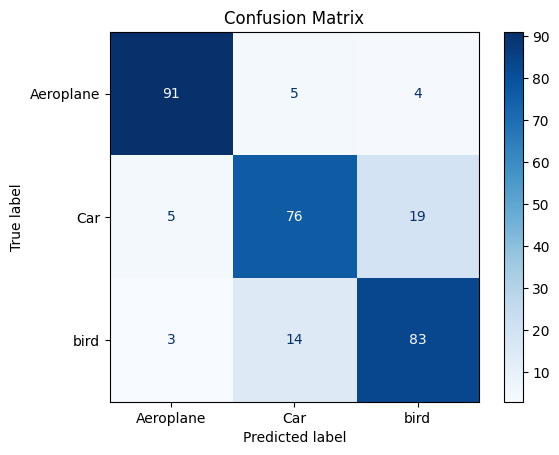

Test Accuracy: 83.33%


In [ ]:
TestDir = "/content/cifar-3class-data/test"
testImages, testLabels = prepareDataCNN(TestDir)

# Load the trained model
CNNmodel = load_model("/content/cnn_model.keras")

# Predict class 
predictions = CNNmodel.predict(testImages)
print(predictions.shape)

# Find the predicted class (argmax of probabilities)
predicted_classes = np.argmax(predictions, axis=1)

# Plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)

    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Plot confusion matrix
    cm_display.plot(cmap=plt.cm.Blues, values_format='d') 
    plt.title("Confusion Matrix")
    plt.show()

class_names =["Aeroplane" , "Car" , "bird"] 
plot_confusion_matrix(testLabels, predicted_classes, class_names)

test_accuracy = np.mean(predicted_classes == testLabels) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")